In [24]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import ttest_ind
import scipy.stats as ss
matplotlib.style.use('ggplot')
%matplotlib inline
# matplotlib.rcParams['figure.figsize'] = (15, 9)
matplotlib.rcParams['figure.figsize'] = (12, 24)
import pandas as pd
import numpy as np

In [36]:
# use fisher exact test to see if hpv_16 is enriched in squamous or adeno
# contingency table:
#                               adeno   squamous
# number_of_hpv16+_patients:    1         39 
# number_of_hpv16-_patients:    18        24
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[1, 39], [18, 24]])
print(pvalue)


9.88713115817e-06


In [37]:
oddsratio, pvalue = stats.fisher_exact([[12, 12], [7, 51]])
print(pvalue)

0.000468619357628


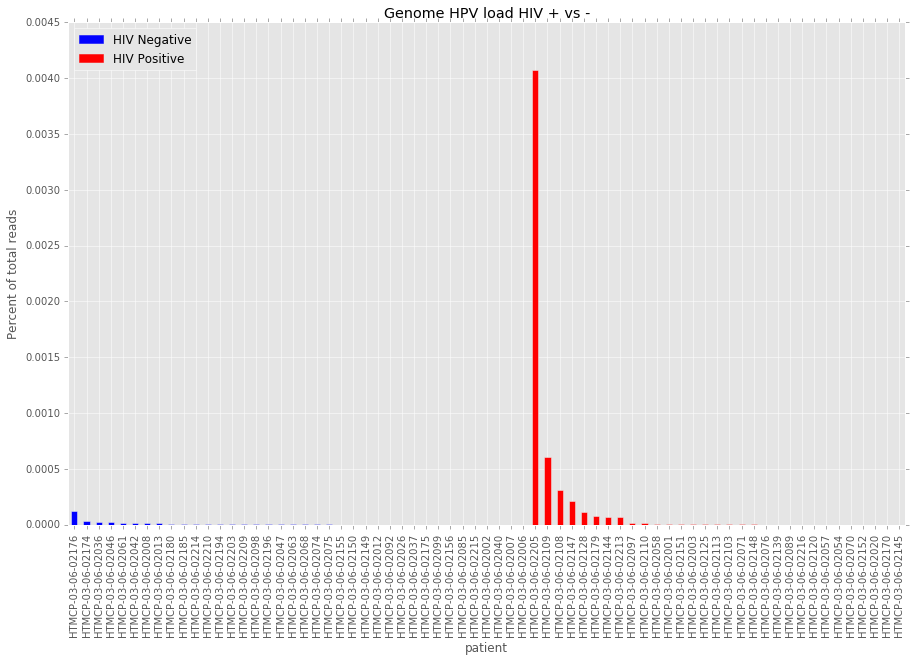

In [82]:
# hpv load
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome phv load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
df.columns
df = df[['HIV_status', 'Human_papillomavirus']]
# grouped = df.groupby('HIV_status')
df = df.sort_values(['HIV_status', 'Human_papillomavirus'], ascending=[True, False])
# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df['Human_papillomavirus'].plot(kind='bar', 
                                color=df['HIV_status'].apply(lambda x: colors[x]), 
                                title='Genome HPV load HIV + vs -')
plt.ylabel('Percent of total reads')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('HPV load HIV + vs -', bbox_inches='tight')


In [92]:
df.sort_values(['Human_papillomavirus'])
# a lot has zero hpv hits, this is bbt results, integrations results have more positives

,HIV_status,Human_papillomavirus
patient,,
HTMCP-03-06-02002,Negative,0.000000e+00
HTMCP-03-06-02099,Negative,0.000000e+00
HTMCP-03-06-02156,Negative,0.000000e+00
HTMCP-03-06-02085,Negative,0.000000e+00
HTMCP-03-06-02215,Negative,0.000000e+00
HTMCP-03-06-02170,Positive,0.000000e+00
HTMCP-03-06-02040,Negative,0.000000e+00
HTMCP-03-06-02175,Negative,0.000000e+00
HTMCP-03-06-02007,Negative,0.000000e+00


In [91]:
df.sort_values()

TypeError: sort_values() takes at least 2 arguments (1 given)

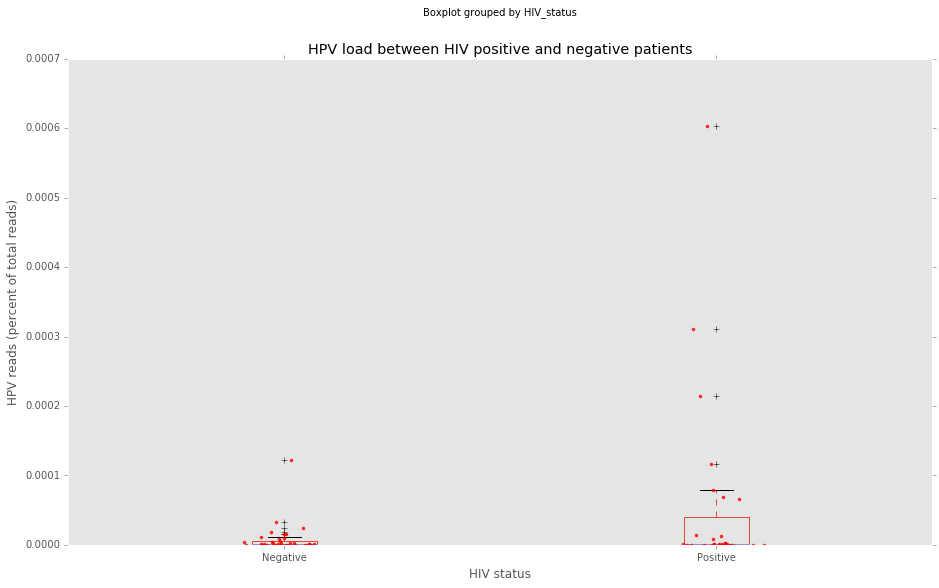

In [57]:
# boxplot for hpv load
# boxplot by groups
fig = plt.figure()
ax = df.boxplot(column='Human_papillomavirus', by='HIV_status', grid=False)
# overlay actuall data points
for i in ['Positive', 'Negative']:
    y = df['Human_papillomavirus'][df['HIV_status']==i]
    if i=='Positive':
        i=2
    elif i=='Negative':
        i=1
    # add jitter
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.8)

ax.set_ylim(0,0.0007)
# ax.set_axis_bgcolor('white')
plt.xlabel("HIV status")
plt.ylabel('HPV reads (percent of total reads)')
plt.title('HPV load between HIV positive and negative patients')
plt.savefig('hpv_load_and_HIV_status.png')

In [58]:
# tie corrected Mann Whitney U test,
negative_load = df[(df['HIV_status']=='Negative') & (df['Human_papillomavirus'] >0.000005)]
positive_load = df[(df['HIV_status']=='Positive') & (df['Human_papillomavirus'] >0.000005)] 
negative_load
ss.mannwhitneyu(negative_load['Human_papillomavirus'], positive_load['Human_papillomavirus'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=24.0, pvalue=0.015866996878448274)

In [59]:
negative_load, positive_load

(                  HIV_status  Human_papillomavirus
 patient                                           
 HTMCP-03-06-02176   Negative              0.000123
 HTMCP-03-06-02174   Negative              0.000033
 HTMCP-03-06-02036   Negative              0.000024
 HTMCP-03-06-02046   Negative              0.000019
 HTMCP-03-06-02061   Negative              0.000016
 HTMCP-03-06-02042   Negative              0.000015
 HTMCP-03-06-02008   Negative              0.000011
 HTMCP-03-06-02013   Negative              0.000010
 HTMCP-03-06-02180   Negative              0.000008
 HTMCP-03-06-02185   Negative              0.000005,
                   HIV_status  Human_papillomavirus
 patient                                           
 HTMCP-03-06-02205   Positive              0.004070
 HTMCP-03-06-02109   Positive              0.000603
 HTMCP-03-06-02108   Positive              0.000311
 HTMCP-03-06-02147   Positive              0.000214
 HTMCP-03-06-02128   Positive              0.000117
 HTMCP-03-0

In [95]:
# look at total microbial load
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.sort_values('genome_load')
# df['load'].sort_values().plot(kind='bar')

,genome_load
patient,
HTMCP-03-06-02215,0.000000
HTMCP-03-06-02002,0.000006
HTMCP-03-06-02026,0.000009
HTMCP-03-06-02152,0.000012
HTMCP-03-06-02040,0.000016
HTMCP-03-06-02020,0.000017
HTMCP-03-06-02149,0.000018
HTMCP-03-06-02145,0.000020
HTMCP-03-06-02099,0.000024


In [65]:
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')
# look at genome microbial load
df = df[df.data_type=='transcriptome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
# keep a column as data frame instead of Series

df_transcriptome = df.loc[:, ['load']]
df_transcriptome = df_transcriptome.rename(columns = {'load':'trans_load'}) 
df_transcriptome.head()
# df['load'].sort_values().plot(kind='bar')

,trans_load
patient,
HTMCP-03-06-02036,0.266325
HTMCP-03-06-02037,0.008568
HTMCP-03-06-02047,0.726650
HTMCP-03-06-02210,0.097741
HTMCP-03-06-02092,0.025371


In [66]:
df_joined = df_genome.join(df_transcriptome, how='outer')

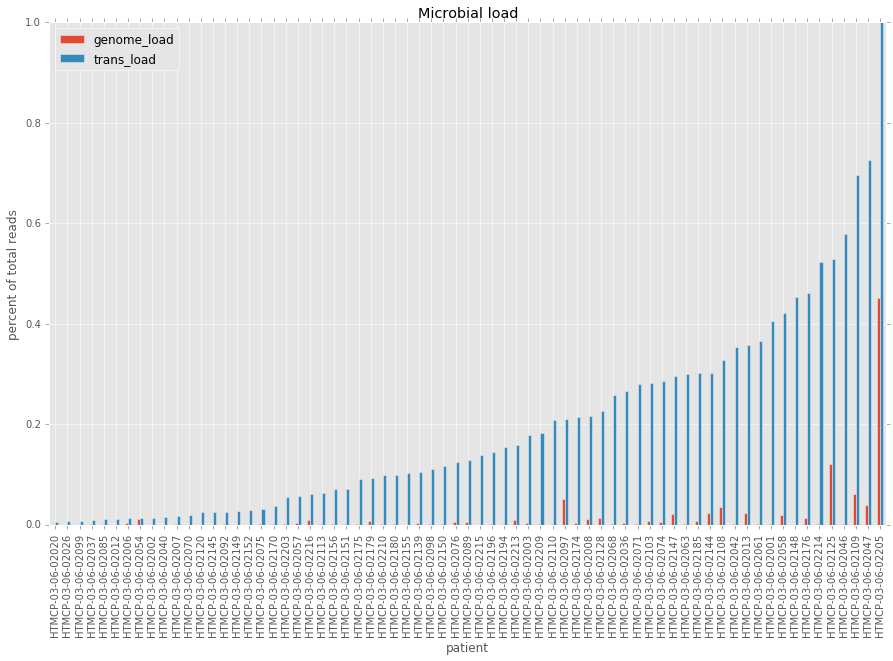

In [67]:
fig = plt.figure()
df_joined.sort_values(['trans_load']).plot(kind='bar', ylim=(0, 1), title='Microbial load')
plt.ylabel('percent of total reads')
# prevent figure cut off
plt.savefig("HIV_cervical_microbial_load.png",bbox_inches='tight')

# plot 5 most dominant bacteria/virus

In [16]:
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
#                  sep='\t', index_col='patient')
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/101_patients/BBT_matrix.txt', 
                 sep='\t', index_col='patient')


# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'vectors', 'phiX', 'other_bacteria', 'multiMatch', 'noMatch'], axis=1)

In [17]:
df.columns

Index([u'Burkholderia_spp', u'Campylobacter_spp', u'Chlamydia_spp',
       u'Clostridium_spp', u'Escherichia_coli', u'Bacteriodes_spp',
       u'Fusobacterium_nucleatum', u'Helicobacter_pylori', u'Klebsiella_spp',
       u'Listeria_spp', u'Mycobacterium_spp', u'Propionibacterium_spp',
       u'Pseudomonas_spp', u'Ralstonia_spp', u'Shigella_spp',
       u'Staphylococcus_spp', u'Streptococcus_spp', u'Yersinia_spp',
       u'Aspergillus_spp', u'Candida_albican', u'Cryptococcus_spp',
       u'Saccharomyces_cerevisiae', u'human', u'Entamoeba_histolytica',
       u'Bradyrhizobium_spp', u'Gordonia_polyisoprenivorans',
       u'Hepatitis_B_virus', u'Hepatitis_C_virus', u'Human_adenoviruses',
       u'Human_herpesvirus_1', u'Human_herpesvirus_2', u'Human_herpesvirus_3',
       u'Human_herpesvirus_4', u'Human_herpesvirus_5', u'Human_herpesvirus_6A',
       u'Human_herpesvirus_6B', u'Human_herpesvirus_7', u'Human_herpesvirus_8',
       u'Human_immunodeficiency_virus', u'Human_papillomavirus',
   

In [18]:
df = (df*100)

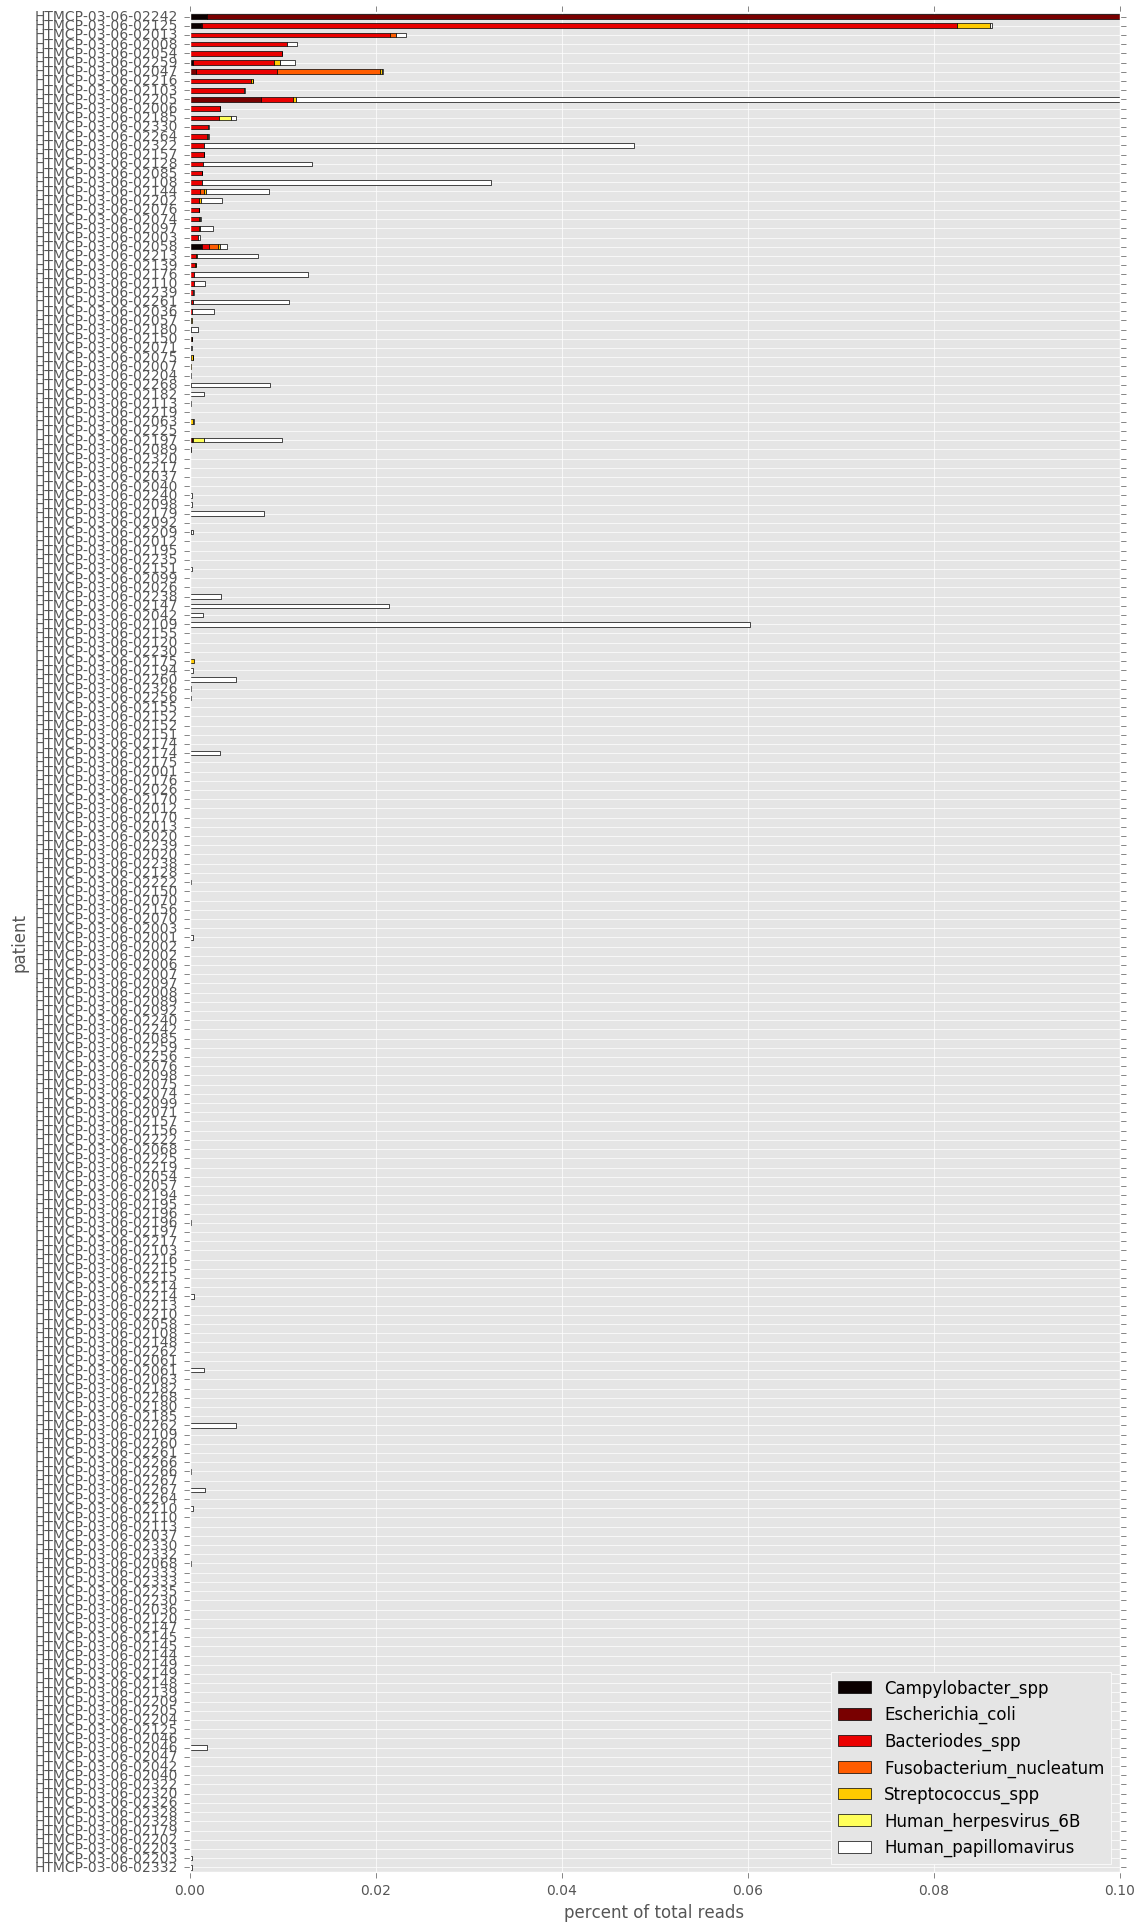

In [25]:
headers = [i for i in df.columns if df[i].max() >0.001]
# headers = [i for i in df.columns if df[i].max() >0]
num_colors = len(headers)
fig = plt.figure(figsize=(12, 40))
colors = plt.cm.hot(np.linspace(0, 1, num_colors))

df[headers].sort_values(['Bacteriodes_spp']).plot(kind='barh', legend=True, stacked=True, xlim=(0, 0.1), color=colors, edgecolor='black')
plt.xlabel('percent of total reads')
plt.savefig('Microbial_load_distribution_0_point_001_percent_zoomin_bacteroides.png', bbox_inches='tight')

In [23]:
df.head(2)

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,Listeria_spp,...,Human_herpesvirus_6B,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas_spp
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02238,0.0,0.0,0,3.800000e-07,3.800000e-07,7.500000e-07,0.0,0.0,0.0,0.0,...,3.800000e-07,0.000002,0.0,0.0,0.003409,0.0,7.500000e-07,0.0,0,0.0
HTMCP-03-06-02238,0.0,0.0,0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000,0.0,0.0,0.000000,0.0,0.000000e+00,0.0,0,0.0


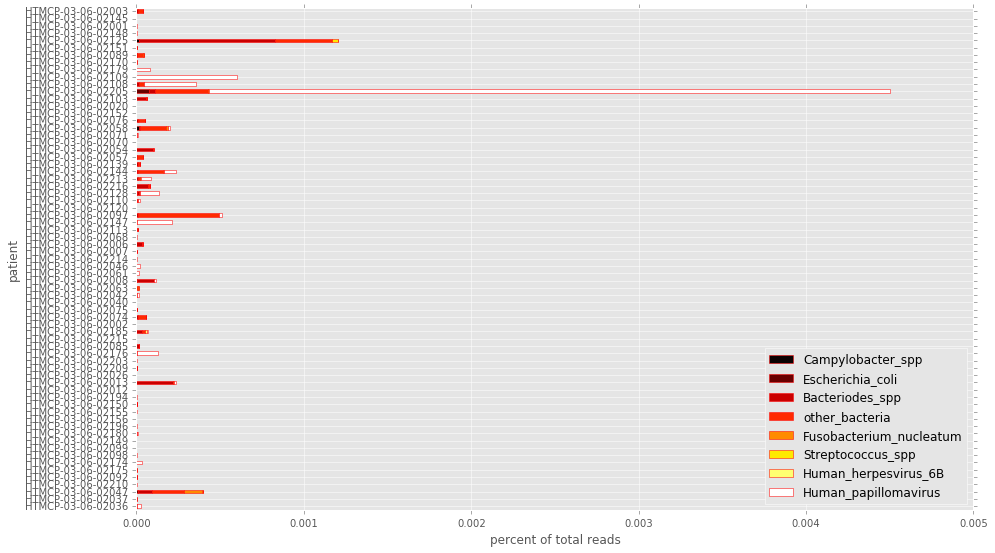

In [237]:
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)

headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]
num_colors = len(headers)
fig = plt.figure()
colors = plt.cm.hot(np.linspace(0, 1, num_colors))

df[headers].plot(kind='barh', legend=True, stacked=True, xlim=(0), color=colors, edgecolor='red')
plt.xlabel('percent of total reads')
plt.savefig('Microbial load distribution', bbox_inches='tight')

In [355]:
df.head()

,HIV_status,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,...,Human_herpesvirus_7,Human_herpesvirus_8,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,Polyomaviruses,Rotaviruses,Sphingomonas_spp,load
patient,,,,,,,,,,,,,,,,,,,,,
HTMCP-03-06-02036,Negative,4.983000e-07,0.000000,0,1.993000e-07,0.000002,0.000005,0.000074,4.584300e-06,0,...,0.0,0,0.0,2.542760e-03,0.0,6.976000e-07,9.966000e-07,0,3.986000e-07,0.254276
HTMCP-03-06-02037,Negative,2.752000e-07,0.000000,0,0.000000e+00,0.000002,0.000000,0.000056,2.752000e-07,0,...,0.0,0,0.0,9.170000e-08,0.0,2.752000e-07,9.173000e-07,0,9.170000e-08,0.000009
HTMCP-03-06-02047,Negative,1.620200e-06,0.000002,0,1.582120e-05,0.000006,0.000325,0.000886,5.071170e-03,0,...,0.0,0,0.0,8.742640e-04,0.0,1.524900e-06,2.096800e-06,0,6.672000e-07,0.087426
HTMCP-03-06-02210,Negative,1.126200e-06,0.000000,0,0.000000e+00,0.000004,0.000000,0.000068,1.251000e-07,0,...,0.0,0,0.0,5.930030e-04,0.0,1.251000e-07,1.251000e-07,0,5.005000e-07,0.059300
HTMCP-03-06-02092,Negative,5.868000e-07,0.000000,0,1.956000e-07,0.000002,0.000000,0.000229,0.000000e+00,0,...,0.0,0,0.0,0.000000e+00,0.0,5.868000e-07,1.369300e-06,0,9.780000e-08,0.000000


In [104]:
# HIV status associated with microbial load?
# this file only have data for 69 patients
# df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
#                  sep='\t', index_col='patient')
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/82_patients/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_82_patients_12232016.csv',
                sep='\t', index_col='patient')

df.head()

# look at genome microbial load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
# df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
# df['load'] = df['Human_papillomavirus']*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.to_csv('microbial_load_genome.txt', sep='\t')

In [105]:
!pwd

/projects/trans_scratch/validations/workspace/szong/Cervical/bbt


In [79]:
df_genome.ix['HTMCP-03-06-02007']

HIV_status       Negative
genome_load    0.00047001
Name: HTMCP-03-06-02007, dtype: object

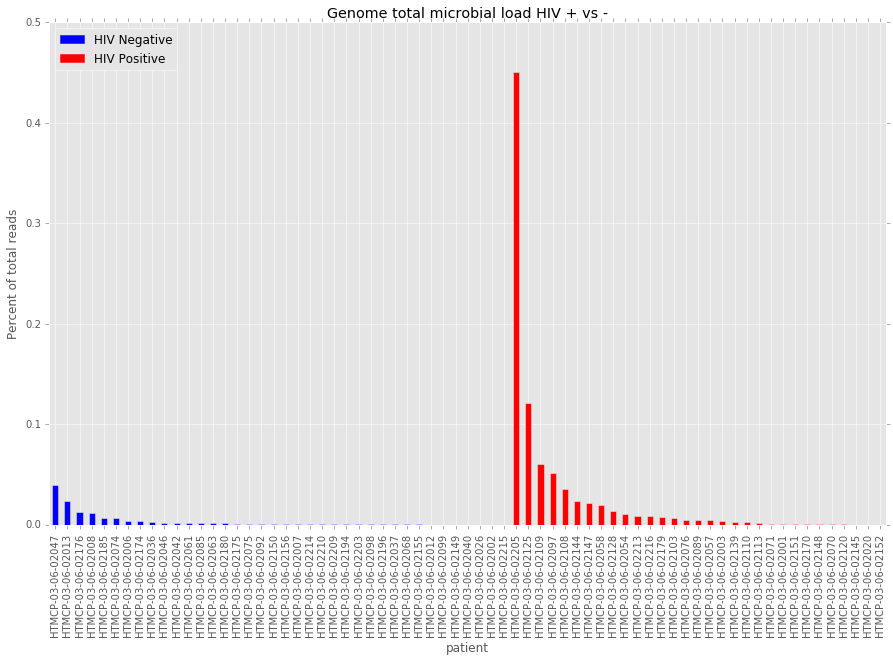

In [69]:
# df.sort_values(['a', 'b'], ascending=[True, False])
df_genome_sorted = df_genome.sort_values(['HIV_status', 'genome_load'], ascending=[True, False])
# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df_genome_sorted['genome_load'].plot(kind='bar', 
                                     color=df['HIV_status'].apply(lambda x: colors[x]), 
                                     title='Genome total microbial load HIV + vs -')
plt.ylabel('Percent of total reads')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('Microbial load HIV + vs -', bbox_inches='tight')
# plt.legend()
# df_genome_sorted

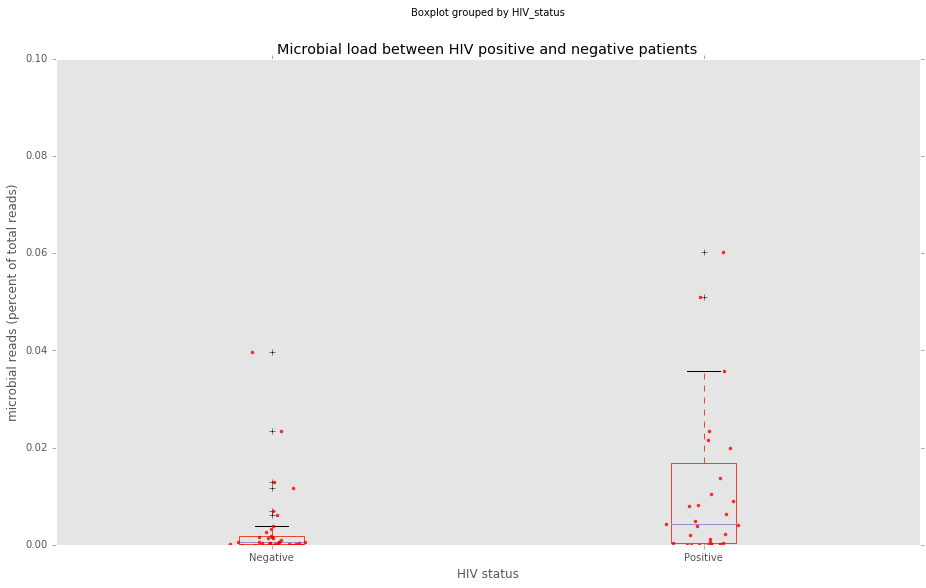

In [72]:
df = df_genome
df.head()

# bp = titanic.boxplot(column='age', by='pclass', grid=False)
# for i in [1,2,3]:
#     y = titanic.age[titanic.pclass==i].dropna()
#     # Add some random "jitter" to the x-axis
#     x = np.random.normal(i, 0.04, size=len(y))
#     plt.plot(x, y, 'r.', alpha=0.2)


# boxplot by groups
fig = plt.figure()
ax = df.boxplot(column='genome_load', by='HIV_status', grid=False)
# overlay actuall data points
for i in ['Positive', 'Negative']:
    y = df['genome_load'][df['HIV_status']==i]
    if i=='Positive':
        i=2
    elif i=='Negative':
        i=1
    # add jitter
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'r.', alpha=0.8)

ax.set_ylim(0,0.1)
# ax.set_axis_bgcolor('white')
plt.xlabel("HIV status")
plt.ylabel('microbial reads (percent of total reads)')
plt.title('Microbial load between HIV positive and negative patients')
plt.savefig('microbial_load_and_HIV_status.png')

In [73]:
# df['genome_load'][df['HIV_status']]
# df['HIV_status']=='Negative'
df['genome_load'][df['HIV_status']=='Negative']

patient
HTMCP-03-06-02036    0.002699
HTMCP-03-06-02037    0.000150
HTMCP-03-06-02047    0.039684
HTMCP-03-06-02210    0.000399
HTMCP-03-06-02092    0.000508
HTMCP-03-06-02175    0.000642
HTMCP-03-06-02174    0.003327
HTMCP-03-06-02098    0.000242
HTMCP-03-06-02099    0.000024
HTMCP-03-06-02149    0.000018
HTMCP-03-06-02180    0.001064
HTMCP-03-06-02196    0.000178
HTMCP-03-06-02156    0.000474
HTMCP-03-06-02155    0.000074
HTMCP-03-06-02150    0.000501
HTMCP-03-06-02194    0.000344
HTMCP-03-06-02012    0.000036
HTMCP-03-06-02013    0.023432
HTMCP-03-06-02026    0.000009
HTMCP-03-06-02209    0.000367
HTMCP-03-06-02203    0.000256
HTMCP-03-06-02176    0.012833
HTMCP-03-06-02085    0.001407
HTMCP-03-06-02215    0.000000
HTMCP-03-06-02185    0.006958
HTMCP-03-06-02002    0.000006
HTMCP-03-06-02074    0.006044
HTMCP-03-06-02075    0.000625
HTMCP-03-06-02040    0.000016
HTMCP-03-06-02042    0.001621
HTMCP-03-06-02063    0.001402
HTMCP-03-06-02008    0.011654
HTMCP-03-06-02061    0.001591
HT

In [62]:
df['genome_load']


patient
HTMCP-03-06-02036    0.002699
HTMCP-03-06-02037    0.000150
HTMCP-03-06-02047    0.039684
HTMCP-03-06-02210    0.000399
HTMCP-03-06-02092    0.000508
HTMCP-03-06-02175    0.000642
HTMCP-03-06-02174    0.003327
HTMCP-03-06-02098    0.000242
HTMCP-03-06-02099    0.000024
HTMCP-03-06-02149    0.000018
HTMCP-03-06-02180    0.001064
HTMCP-03-06-02196    0.000178
HTMCP-03-06-02156    0.000474
HTMCP-03-06-02155    0.000074
HTMCP-03-06-02150    0.000501
HTMCP-03-06-02194    0.000344
HTMCP-03-06-02012    0.000036
HTMCP-03-06-02013    0.023432
HTMCP-03-06-02026    0.000009
HTMCP-03-06-02209    0.000367
HTMCP-03-06-02203    0.000256
HTMCP-03-06-02176    0.012833
HTMCP-03-06-02085    0.001407
HTMCP-03-06-02215    0.000000
HTMCP-03-06-02185    0.006958
HTMCP-03-06-02002    0.000006
HTMCP-03-06-02074    0.006044
HTMCP-03-06-02075    0.000625
HTMCP-03-06-02040    0.000016
HTMCP-03-06-02042    0.001621
                       ...   
HTMCP-03-06-02147    0.021488
HTMCP-03-06-02097    0.050982
HT

In [50]:
negative_load.head()

,HIV_status,genome_load
patient,,
HTMCP-03-06-02047,Negative,0.726650
HTMCP-03-06-02046,Negative,0.578442
HTMCP-03-06-02214,Negative,0.523275
HTMCP-03-06-02176,Negative,0.461949
HTMCP-03-06-02061,Negative,0.365387


In [74]:
# t test to see if difference in microbial load is significant
negative_load = df_genome_sorted[df_genome_sorted['HIV_status']=='Negative']
positive_load = df_genome_sorted[(df_genome_sorted['HIV_status']=='Positive')]# & (df_genome_sorted['genome_load'] <20)] 
negative_load
# ttest_ind(negative_load['genome_load'], positive_load['genome_load'])
# Negative = df[(df['HIV_status']=='Negative')]
# Positive = df[df['HIV_status']=='Positive']

# tie corrected Mann Whitney U test,
ss.mannwhitneyu(negative_load['genome_load'], positive_load['genome_load'], use_continuity=True, alternative=None)

MannwhitneyuResult(statistic=376.0, pvalue=0.0051816134011028548)

In [80]:
# HIV status associated with microbial load?
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.head()
df_genome_sorted = df_genome.sort_values(['HIV_status'])

In [81]:
df_genome.ix['HTMCP-03-06-02036']

HIV_status       Negative
genome_load    0.00269866
Name: HTMCP-03-06-02036, dtype: object

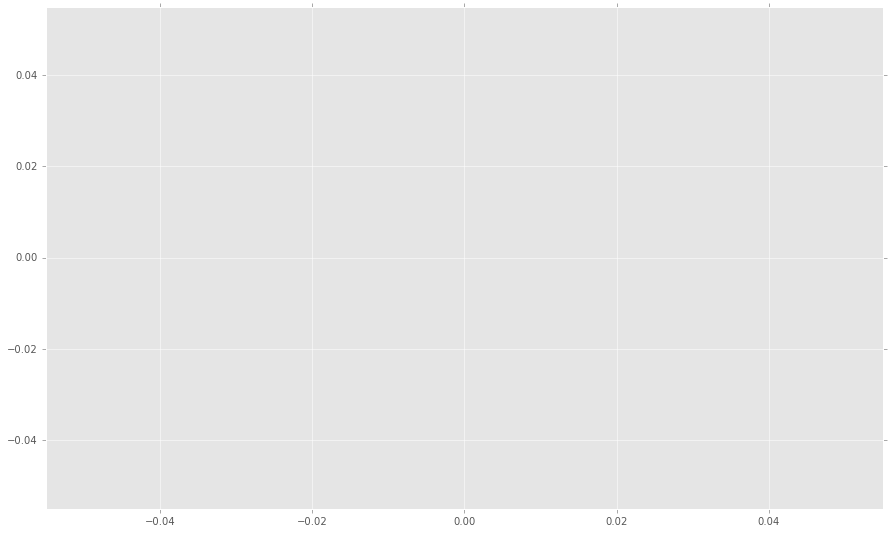

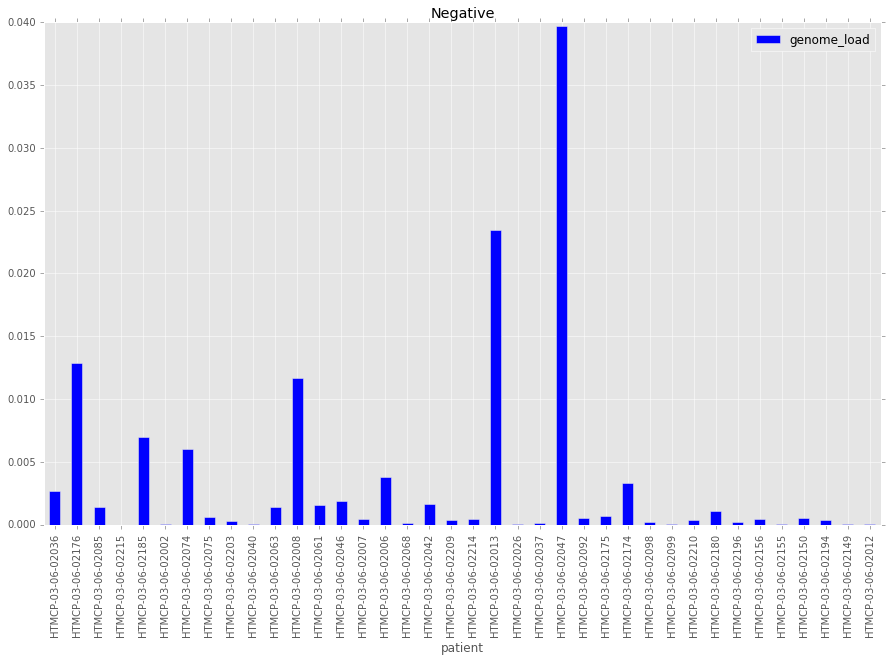

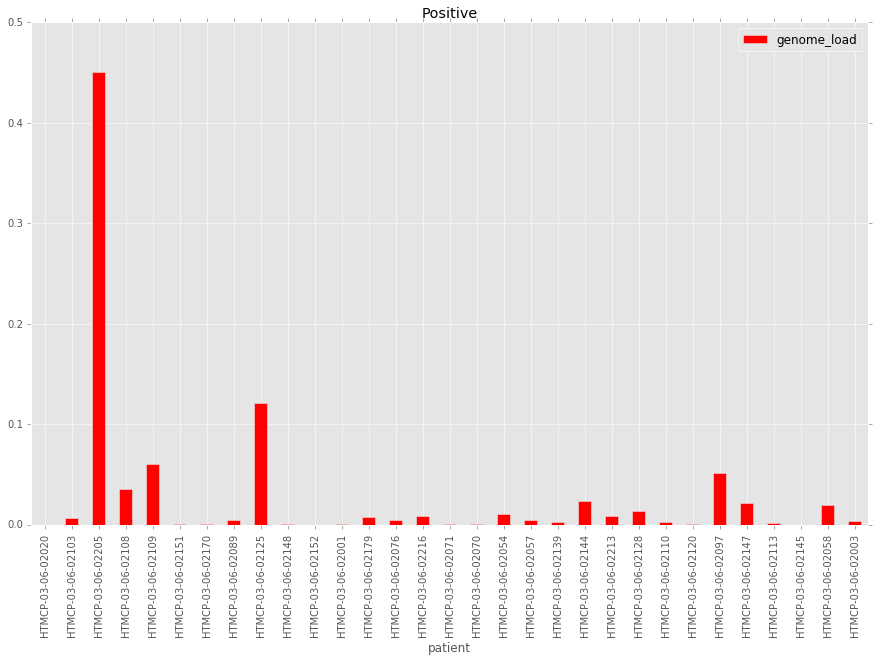

In [76]:
groups = df_genome_sorted.groupby('HIV_status')
# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
colors = {'Negative':'blue', 'Positive':'red'}

for name, group in groups:
    group.plot(kind='bar', title=name, color=colors[name])

plt.show()

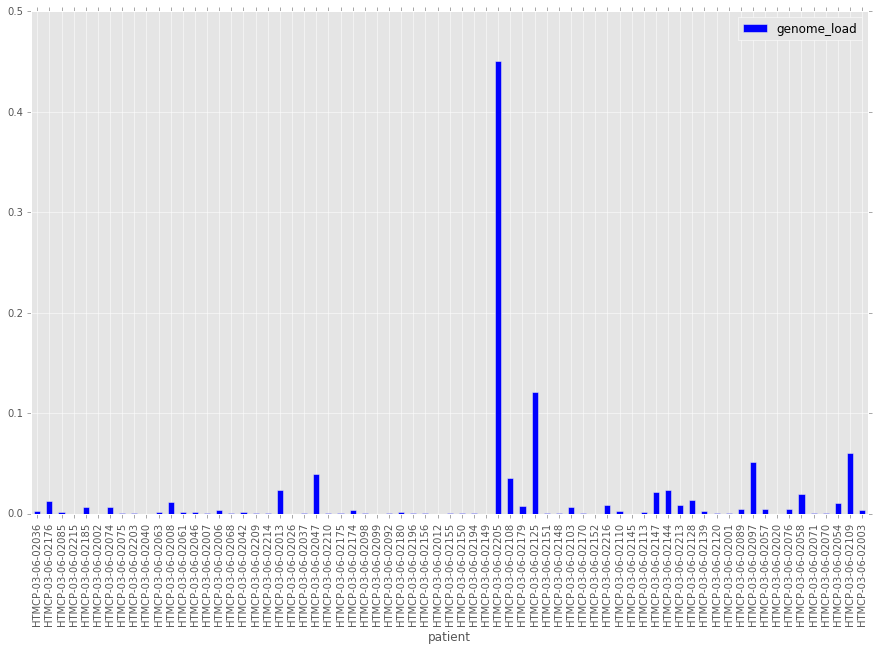

In [280]:
# HIV status associated with microbial load?
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

# look at genome microbial load
df = df[df.data_type=='genome']

# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
df = df.drop(['tissue_status', 'data_type', 'library_id', 'vectors', 'phiX'], axis=1)
# df = df.drop('HTMCP-03-06-02205')

# iloc support integer index
# loc support label index
# df.iloc[[2]]
# df.loc[['HTMCP-03-06-02205']]
# df.idxmax(axis=1)

# headers = [i for i in df.columns if df[i].max() >0.00001]
# headers = [i for i in df.columns if df[i].max() >0]

df['load'] = df.sum(axis=1)*100
df_genome = df.loc[:, ['HIV_status', 'load']]
df_genome = df_genome.rename(columns = {'load':'genome_load'})
df_genome.head()

df_genome_sorted = df_genome.sort_values(['HIV_status'])
# colors = df_genome_sorted['HIV_status']
colors = {'Negative':'blue', 'negative':'blue', 'positive':'red', 'Positive':'red'}

# ax.scatter(df['carat'], df['price'], c=df['color'].apply(lambda x: colors[x]))
df_genome_sorted.plot(kind='bar', color=df_genome_sorted['HIV_status'].apply(lambda x: colors[x]))
# df_genome_sorted

In [26]:
df[i for i in df.columns if df[df.columns[i]] >0.000001]



SyntaxError: invalid syntax (<ipython-input-26-0ab66543ce24>, line 1)

In [ ]:
# drop columns < 0.000001
df.drop()

/home/szong/projects/development/coverage/venv/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


ValueError: too many values to unpack

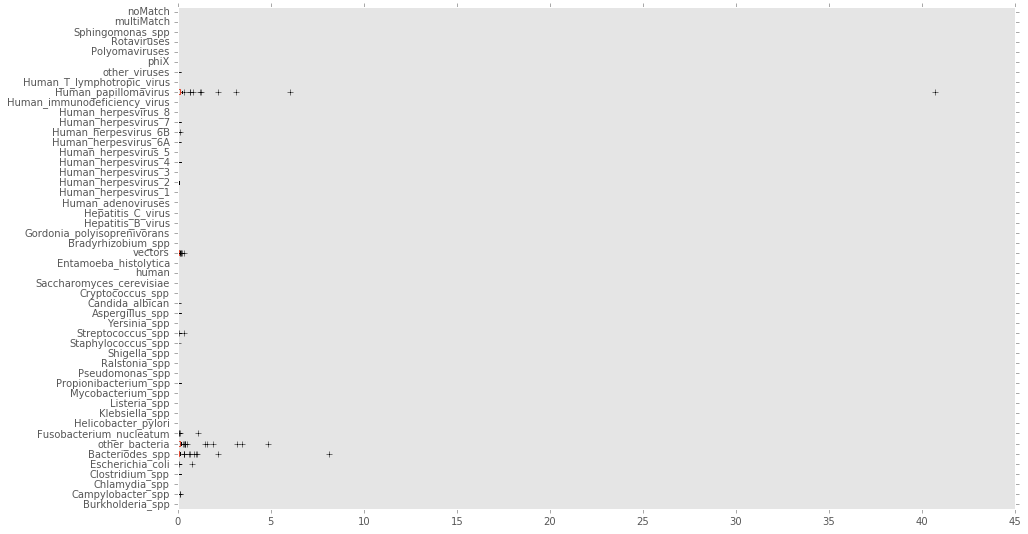

In [29]:
# HIV status associated with microbial load?
df = pd.read_csv('/projects/trans_scratch/validations/workspace/szong/Cervical/bbt/NCI_HIV_Cervial_genome_and_transcriptome_BBT_results_03092016.csv', 
                 sep='\t', index_col='patient')

df.head()

# look at genome microbial load
df = df[df.data_type=='genome']
# df = df[df.data_type=='transcriptome']
# drop columns axis =1
# df = df.drop(['tissue_status', 'HIV_status', 'data_type', 'library_id', 'other_bacteria', 'other_viruses', 'vectors'], axis=1)
# df = df.drop(['tissue_status', 'data_type', 'HIV_status','library_id', 'vectors', 'phiX', 'multiMatch', 'noMatch'], axis=1)
df.head()
df = df*10000


# df.plot(df.index, df.columns, kind='scatter')
# df.drop(['Human_papillomavirus'], axis=1, inplace=True)
fig, ax = df.boxplot(vert=False, grid=False)
ax.set_xlim(0,5)

In [391]:
df.index

Index([u'Burkholderia_spp', u'Campylobacter_spp', u'Chlamydia_spp',
       u'Clostridium_spp', u'Escherichia_coli', u'Bacteriodes_spp',
       u'other_bacteria', u'Fusobacterium_nucleatum', u'Helicobacter_pylori',
       u'Klebsiella_spp', u'Listeria_spp', u'Mycobacterium_spp',
       u'Propionibacterium_spp', u'Pseudomonas_spp', u'Ralstonia_spp',
       u'Shigella_spp', u'Staphylococcus_spp', u'Streptococcus_spp',
       u'Yersinia_spp', u'Aspergillus_spp', u'Candida_albican',
       u'Cryptococcus_spp', u'Saccharomyces_cerevisiae', u'human',
       u'Entamoeba_histolytica', u'Bradyrhizobium_spp',
       u'Gordonia_polyisoprenivorans', u'Hepatitis_B_virus',
       u'Hepatitis_C_virus', u'Human_adenoviruses', u'Human_herpesvirus_1',
       u'Human_herpesvirus_2', u'Human_herpesvirus_3', u'Human_herpesvirus_4',
       u'Human_herpesvirus_5', u'Human_herpesvirus_6A',
       u'Human_herpesvirus_6B', u'Human_herpesvirus_7', u'Human_herpesvirus_8',
       u'Human_immunodeficiency_virus', u'

In [16]:


# df['load'] = df.sum(axis=1)*100
# # df['load'] = df['Human_papillomavirus']*100
# df_genome = df.loc[:, ['HIV_status', 'load']]
# df_genome = df_genome.rename(columns = {'load':'genome_load'})
# df_genome.head()
# # df.sort_values(['a', 'b'], ascending=[True, False])
# df_genome_sorted = df_genome.sort_values(['HIV_status', 'genome_load'], ascending=[True, False])
# # colors = df_genome_sorted['HIV_status']
# colors = {'Negative':'blue', 'Positive':'red'}
fig = plt.figure()
# all following 3 works, just pass a list of colors
# df_genome_sorted['genome_load'].plot(kind='bar', color=[colors[i] for i in df_genome_sorted['HIV_status']])
# df_genome_sorted['genome_load'].plot(kind='bar', color=list(df_genome_sorted['HIV_status'].map(colors)))
df_genome_sorted['genome_load'].plot(kind='bar', 
                                     color=df['HIV_status'].apply(lambda x: colors[x]), 
                                     title='Genome total microbial load HIV + vs -')
plt.ylabel('Percent of total reads')

# draw customized legend
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

Negative = mpatches.Patch(color='blue', label='HIV Negative')
Positive = mpatches.Patch(color='red', label='HIV Positive')

plt.legend(handles=[Negative, Positive], loc=2)
plt.savefig('Microbial load HIV + vs -', bbox_inches='tight')
# plt.legend()
# df_genome_sorted

,Burkholderia_spp,Campylobacter_spp,Chlamydia_spp,Clostridium_spp,Escherichia_coli,Bacteriodes_spp,other_bacteria,Fusobacterium_nucleatum,Helicobacter_pylori,Klebsiella_spp,...,Human_immunodeficiency_virus,Human_papillomavirus,Human_T_lymphotropic_virus,other_viruses,phiX,Polyomaviruses,Rotaviruses,Sphingomonas_spp,multiMatch,noMatch
count,6.900000e+01,6.900000e+01,69.0,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,6.900000e+01,69.0,6.900000e+01,...,69.0,69.000000,69.0,6.900000e+01,6.900000e+01,6.900000e+01,69.0,69.0,69.0,69.0
mean,5.000000e-10,4.173696e-07,0.0,1.056362e-07,1.255351e-06,2.417633e-05,2.898303e-05,1.983493e-06,0.0,5.894203e-09,...,0.0,0.000085,0.0,1.607246e-08,4.392754e-09,1.144928e-10,0.0,0.0,0.0,0.0
std,1.983461e-09,2.246599e-06,0.0,3.551186e-07,9.267619e-06,1.019219e-04,8.476404e-05,1.338969e-05,0.0,3.345666e-08,...,0.0,0.000494,0.0,3.360868e-08,1.569560e-08,9.510482e-10,0.0,0.0,0.0,0.0
min,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
25%,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,8.460000e-08,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000000,0.0,4.300000e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
50%,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,5.940000e-08,6.673000e-07,0.000000e+00,0.0,0.000000e+00,...,0.0,0.000001,0.0,8.600000e-09,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
75%,0.000000e+00,1.870000e-08,0.0,3.900000e-08,2.500000e-08,8.494600e-06,9.201000e-06,6.800000e-08,0.0,0.000000e+00,...,0.0,0.000010,0.0,1.900000e-08,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0
max,1.180000e-08,1.381300e-05,0.0,2.610600e-06,7.682160e-05,8.123690e-04,4.841720e-04,1.108520e-04,0.0,2.674000e-07,...,0.0,0.004070,0.0,2.749000e-07,1.141000e-07,7.900000e-09,0.0,0.0,0.0,0.0


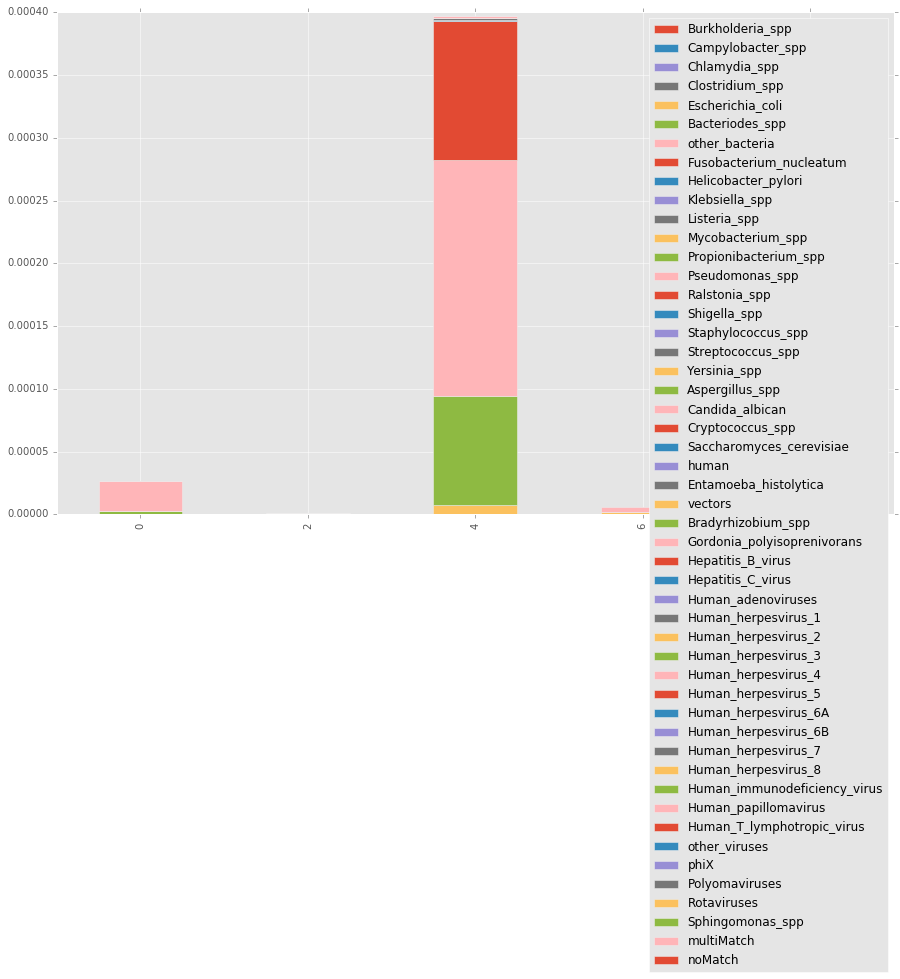

In [15]:
df.head().plot(kind='bar', legend=False, stacked=True)
plt.legend()